In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
import numpy as np
import matplotlib.pyplot as plt

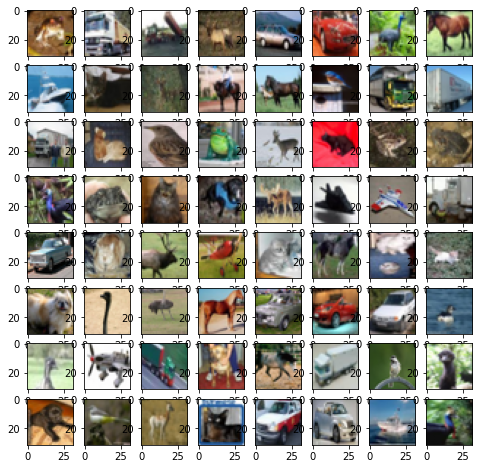

In [7]:
fig=plt.figure(figsize=(8,8)) # 8*8 inches figures

for i in range(64): #first 64 images
    ax=fig.add_subplot(8,8,i+1) #8 rows, 8 columns and position number (numbering starts from 1)
    ax.imshow(images_train[i],cmap=plt.cm.bone) #to show with a different theme
    
plt.show()

In [8]:
images_train.shape

(50000, 32, 32, 3)

In [9]:
images_test.shape

(10000, 32, 32, 3)

In [10]:
x_train=images_train.reshape(50000,3072)
x_test=images_test.reshape(10000,3072)

In [11]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

In [12]:
pca=PCA()
pca.fit(x_train)

PCA()

In [13]:
#Finding optimal number of fearures/components
total= sum(pca.explained_variance_)

k=0
current_variance=0
while current_variance/total < 0.99: #want to maintain 95% variance
    current_variance+=pca.explained_variance_[k]
    k+=1
k

658

In [14]:
pca_cifar=PCA(n_components=k,whiten=True)
x_transformed=pca_cifar.fit_transform(x_train)
x_transformed.shape

(50000, 658)

In [15]:
x_train_pca=x_transformed
x_test_pca=pca_cifar.transform(x_test)

In [16]:
#Using RandomForestClassifier after applying PCA #score =0.4404 for k =217
rf=ensemble.RandomForestClassifier()
rf.fit(x_train_pca,cls_train) 
y_pred1=rf.predict(x_test_pca)
rf.score(x_test_pca,cls_test)

0.3826

In [17]:
#Using SVM
#svc = svm.SVC(C= 5000, gamma=0.001) #score=0.5654 for k=217 and C= 1000, gamma=0.005
#svc.fit(x_train_pca,cls_train)
#y_pred2=svc.predict(x_test_pca)
#svc.score(x_test_pca,cls_test)

In [ ]:
clf1=svm.SVC(kernel='linear')
clf1.fit(x_train_pca,cls_train)
y_pred3=clf1.predict(x_test_pca)
clf1.score(x_test_pca,cls_test)

In [ ]:
#import numpy as np
#dt=np.dtype('U25')
#output=np.empty((10000),dtype=dt) 
#for i in range(len(y_pred2)):
#    output[i]=class_names[y_pred2[i]]

In [ ]:
#np.savetxt("CIFAR_10_Predictions.csv", output,fmt='%s')